In [1]:
#Import all libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #visualization library
import seaborn as sns #visualization library and it use matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("suv_data.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

<AxesSubplot:>

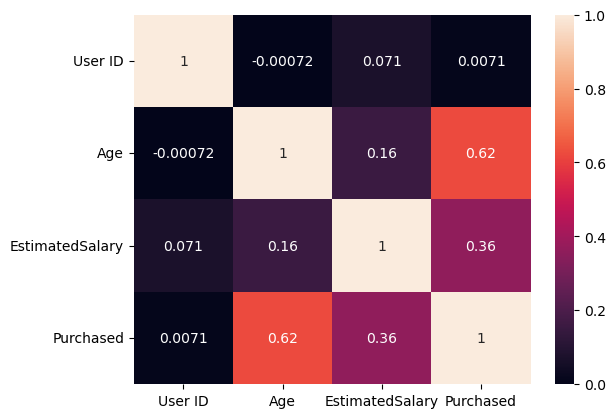

In [4]:
sns.heatmap(data.corr(),annot=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data["User ID"].duplicated().sum()

0

<AxesSubplot:xlabel='Purchased', ylabel='count'>

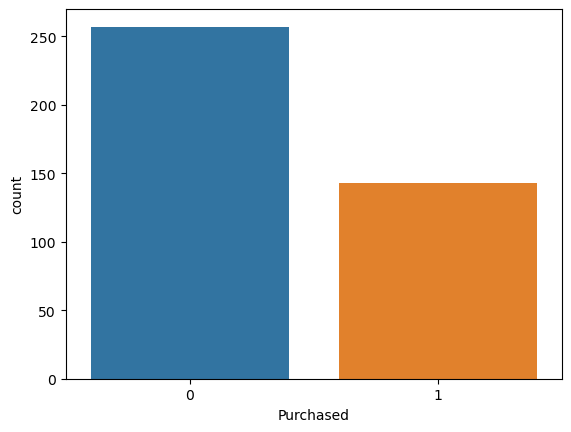

In [10]:
sns.countplot(x = 'Purchased',data= data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

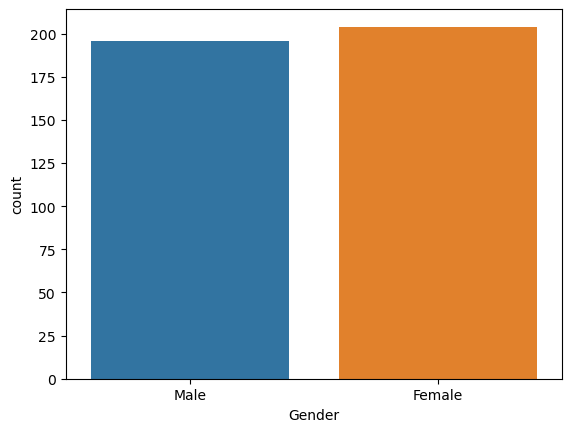

In [11]:
sns.countplot(x='Gender',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

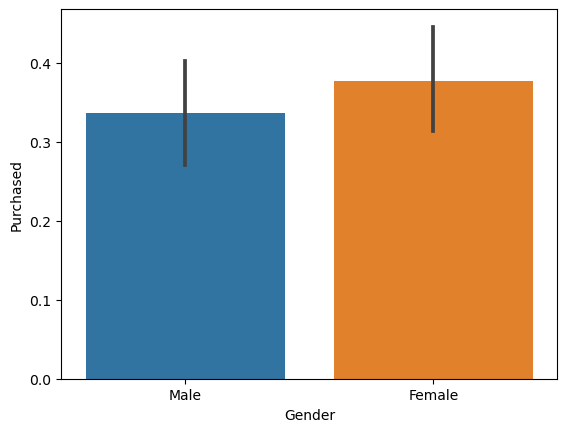

In [12]:
sns.barplot(x='Gender',y='Purchased', data=data)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
data["Gender"]= le.fit_transform(data['Gender'])

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [16]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [17]:
x = data[['User ID', 'Gender', 'Age', 'EstimatedSalary']].values
y = data['Purchased'].values.reshape(-1,1)

In [18]:
x.shape,y.shape

((400, 4), (400, 1))

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state =0)

### 1. Logistic Regression

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear')

In [21]:
lgr.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [22]:
ypred = lgr.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
table = pd.DataFrame({"Actual": ytest.squeeze(), "Predicted": ypred.squeeze()})
print(table.head())

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cfm = confusion_matrix(ytest,ypred)
cfm

array([[56,  2],
       [12, 10]], dtype=int64)

In [25]:
acs = accuracy_score(ytest,ypred)
acs*100

82.5

### 2. Decision Tree

In [26]:
# Decision tree 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini')

In [27]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [28]:
ypred1 = dtc.predict(xtest)
ypred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
table1 = pd.DataFrame({"Actual": ytest.squeeze(), "Predicted": ypred1.squeeze()})
print(table.head())

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


In [30]:
cfm1 = confusion_matrix(ytest,ypred1)
cfm1

array([[55,  3],
       [ 5, 17]], dtype=int64)

In [31]:
acs1 = accuracy_score(ytest,ypred1)
acs1*100

90.0

### 3. Random Forest

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators = 25)

In [33]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=25)

In [34]:
ypred2 = rfc.predict(xtest)
ypred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
table2 = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': ypred2.squeeze()})
table2.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [36]:
cfm2 = confusion_matrix(ytest,ypred2)
cfm2

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [37]:
acs2 = accuracy_score(ytest,ypred2)
acs2*100

95.0

### 4. Naive Bayes

In [38]:
#Naive bayes
from sklearn.naive_bayes import  GaussianNB
gnb = GaussianNB()

In [39]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [40]:
ypred3 = gnb.predict(xtest)
ypred3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [41]:
table3 = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': ypred3.squeeze()})
table3.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [42]:
acs3 = accuracy_score(ytest,ypred3)
acs3*100

92.5

### 5. SVM(support vector machine)

In [43]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [44]:
svc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [45]:
ypred4 = svc.predict(xtest)
ypred4

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [46]:
table4 = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': ypred4.squeeze()})
table4.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [47]:
acs4 = accuracy_score(ytest,ypred4)
acs4*100

81.25

In [49]:
accuracy  = pd.DataFrame({'Algorithms':['Logistics Regression','Decision Tree','Random Forest','Naive Bayes','SVM'],'Accuracy': [acs*100, acs1*100, acs2*100, acs3*100, acs4*100]})
accuracy

,Algorithms,Accuracy
0,Logistics Regression,82.50
1,Decision Tree,90.00
2,Random Forest,95.00
3,Naive Bayes,92.50
4,SVM,81.25


### We use naive bayes or random forest here